In [25]:
#Importamos las librerias
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Credenciales de la API
client_id = '1bcad6ade4bd41a593f267461f73e2db'
client_secret = '6480addfe5e74a83ab335a61231aae27'

# Autenticación
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)


In [3]:
# Función para obtener pistas por género
def get_tracks_by_genre(genre, limit=1000):
    tracks = []
    results = sp.search(q=f'genre:"{genre}"', type='track', limit=50)
    tracks.extend(results['tracks']['items'])
    
    while len(tracks) < limit and results['tracks']['next']:
        results = sp.next(results['tracks'])
        tracks.extend(results['tracks']['items'])
    
    return tracks

# Obtener pistas de varios géneros
genres = ['rock', 'pop', 'hip-hop', 'classical', 'jazz']
all_tracks = []

for genre in genres:
    tracks = get_tracks_by_genre(genre, limit=200)  # Ajusta el límite según sea necesario
    for track in tracks:
        track['genre'] = genre  # Añadir el género como un campo
    all_tracks.extend(tracks)

# Crear listas para los datos
track_names = []
popularity = []
album_names = []
release_dates = []
track_ids = []
artist_names = []
durations = []
genres_list = []

# Llenar las listas con los datos correspondientes
for track in all_tracks:
    track_names.append(track['name'])
    popularity.append(track['popularity'])
    album_names.append(track['album']['name'])
    release_dates.append(track['album']['release_date'])
    track_ids.append(track['id'])
    artist_names.append(track['artists'][0]['name'])  # Primer artista
    durations.append(track['duration_ms'])
    genres_list.append(track['genre'])

# Crear un dataframe con los datos extraídos
df = pd.DataFrame({
    'track_name': track_names,
    'popularity': popularity,
    'album_name': album_names,
    'release_date': release_dates,
    'track_id': track_ids,
    'artist_name': artist_names,
    'duration_ms': durations,
    'genre': genres_list
})


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_name    500 non-null    object
 1   popularity    500 non-null    int64 
 2   album_name    500 non-null    object
 3   release_date  500 non-null    object
 4   track_id      500 non-null    object
 5   artist_name   500 non-null    object
 6   duration_ms   500 non-null    int64 
 7   genre         500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
df.describe()

,popularity,duration_ms
count,500.000000,500.000000
mean,71.588000,192662.188000
std,19.417114,68779.863584
min,21.000000,32421.000000
25%,65.000000,156569.250000
50%,80.000000,190533.000000
75%,84.000000,234149.750000
max,100.000000,438493.000000


In [6]:
df_shape = df.shape
print(f"Dimensiones del DataFrame: {df_shape}")

Dimensiones del DataFrame: (500, 8)


In [7]:
df_columns = df.columns
print(f"Columnas del DataFrame: {df_columns}")

Columnas del DataFrame: Index(['track_name', 'popularity', 'album_name', 'release_date', 'track_id',
       'artist_name', 'duration_ms', 'genre'],
      dtype='object')


In [8]:
# Función para obtener pistas por género
def get_tracks_by_genre(genre, limit=1000):
    tracks = []
    results = sp.search(q=f'genre:"{genre}"', type='track', limit=50)
    tracks.extend(results['tracks']['items'])
    
    while len(tracks) < limit and results['tracks']['next']:
        results = sp.next(results['tracks'])
        tracks.extend(results['tracks']['items'])
    
    return tracks

# Obtener pistas de varios géneros
genres = ['rock', 'pop', 'hip-hop', 'classical', 'jazz']
all_tracks = []

for genre in genres:
    tracks = get_tracks_by_genre(genre, limit=200)  # Ajusta el límite según sea necesario
    for track in tracks:
        track['genre'] = genre  # Añadir el género como un campo
    all_tracks.extend(tracks)

# Crear listas para los datos
track_names = []
popularity = []
album_names = []
release_dates = []
track_ids = []
artist_names = []
durations = []
genres_list = []

# Llenar las listas con los datos correspondientes
for track in all_tracks:
    track_names.append(track['name'])
    popularity.append(track['popularity'])
    album_names.append(track['album']['name'])
    release_dates.append(track['album']['release_date'])
    track_ids.append(track['id'])
    artist_names.append(track['artists'][0]['name'])  # Primer artista
    durations.append(track['duration_ms'])
    genres_list.append(track['genre'])

# Crear un dataframe con los datos extraídos
df = pd.DataFrame({
    'track_name': track_names,
    'popularity': popularity,
    'album_name': album_names,
    'release_date': release_dates,
    'track_id': track_ids,
    'artist_name': artist_names,
    'duration_ms': durations,
    'genre': genres_list
})

# Obtener características de audio para cada pista
audio_features = []
for track_id in track_ids:
    features = sp.audio_features(track_id)[0]
    audio_features.append(features)

# Convertir las características de audio en un dataframe
features_df = pd.DataFrame(audio_features)

# Eliminar la columna 'duration_ms' de features_df para evitar duplicados
features_df = features_df.drop(columns=['duration_ms'])

# Unir el dataframe original con las características de audio
df = df.join(features_df.set_index('id'), on='track_id')

# Mostrar las primeras filas del dataframe combinado
print(df.head())

        track_name  popularity               album_name release_date  \
0        Too Sweet          83  Unreal Unearth: Unheard   2024-03-22   
0        Too Sweet          83  Unreal Unearth: Unheard   2024-03-22   
1  Sweater Weather          91              I Love You.   2013-04-19   
1  Sweater Weather          91              I Love You.   2013-04-19   
2        Evergreen          89                     RMCM   2017-05-17   

                 track_id                    artist_name  duration_ms genre  \
0  0AjmK0Eai4zGrLaJwPvrDp                         Hozier       251424  rock   
0  0AjmK0Eai4zGrLaJwPvrDp                         Hozier       251424  rock   
1  2QjOHCTQ1Jl3zawyYOpxh6              The Neighbourhood       240400  rock   
1  2QjOHCTQ1Jl3zawyYOpxh6              The Neighbourhood       240400  rock   
2  6me7F0aaZjwDo6RJ5MrfBD  Richy Mitch & The Coal Miners        87000  rock   

   danceability  energy  ...  acousticness  instrumentalness  liveness  \
0         0.741   

In [9]:
#Tratamos los nulos
print(df.isnull().sum())


track_name          0
popularity          0
album_name          0
release_date        0
track_id            0
artist_name         0
duration_ms         0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
uri                 0
track_href          0
analysis_url        0
time_signature      0
dtype: int64


In [10]:
#Se verifican los valores duplicados
print(df.duplicated().sum())

42


In [11]:
#Se eliminan los valores duplicados al ser pocos
df.drop_duplicates(inplace=True)

Cuestiones a tener en cuenta:
_ Hay relación entre las características musicales de una canción y su género? En ese caso, se podrá categorizar a una canción científicamente como "Rock" escuchando solamente sus notas?
_ Respecto a la duración de la canción, hay alguna diferencia entre géneros? Hay géneros que propongan piezas musicales más cortas o largas que otros?

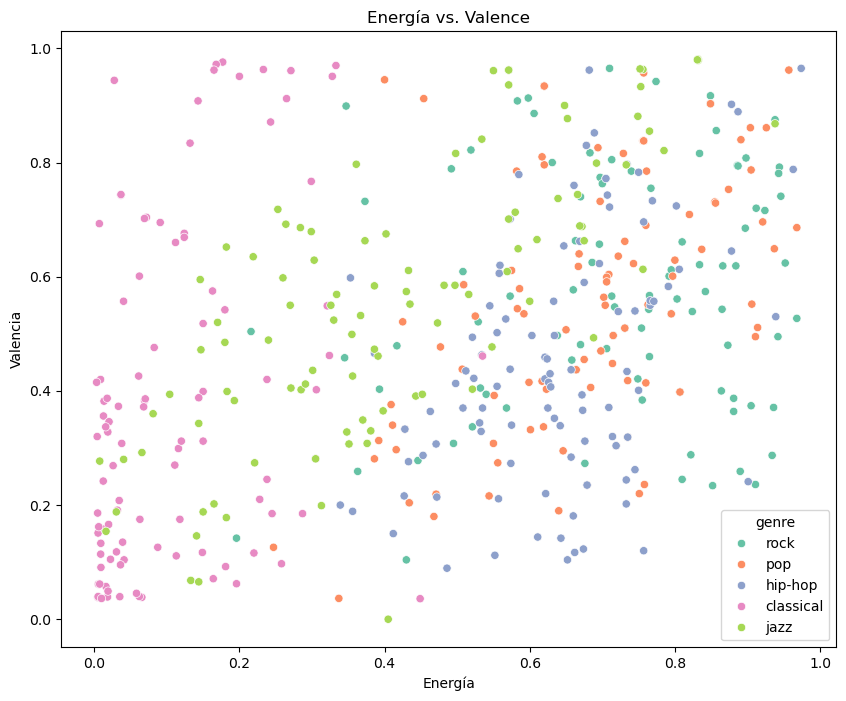

In [12]:
#Hacemos un mapa de dispersión entre la Valence y la Energía de una canción, identificando con canciones de cada género.
#Por ejemplo podemos ver que las canciones "Classical" tienen baja Valence y baja Energía.
# Scatterplot de energía vs valencia
plt.figure(figsize=(10, 8))
sns.scatterplot(x='energy', y='valence', data=df, hue='genre', palette='Set2')
plt.title('Energía vs. Valence')
plt.xlabel('Energía')
plt.ylabel('Valencia')
plt.show()

C:\Users\matias.barcina\AppData\Local\Temp\ipykernel_16148\3221902801.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='duration_ms', data=average_duration, palette='Set2')


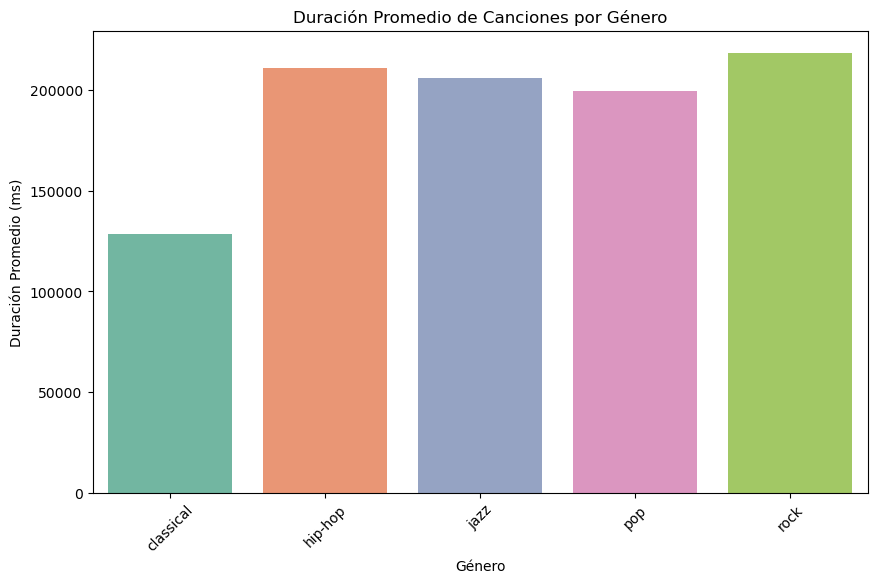

In [13]:
# Calcular la duración promedio por género
average_duration = df.groupby('genre')['duration_ms'].mean().reset_index()

# Gráfico de barras agrupadas de duración promedio por género
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='duration_ms', data=average_duration, palette='Set2')
plt.title('Duración Promedio de Canciones por Género')
plt.xlabel('Género')
plt.ylabel('Duración Promedio (ms)')
plt.xticks(rotation=45)
plt.show()

Características a graficar: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


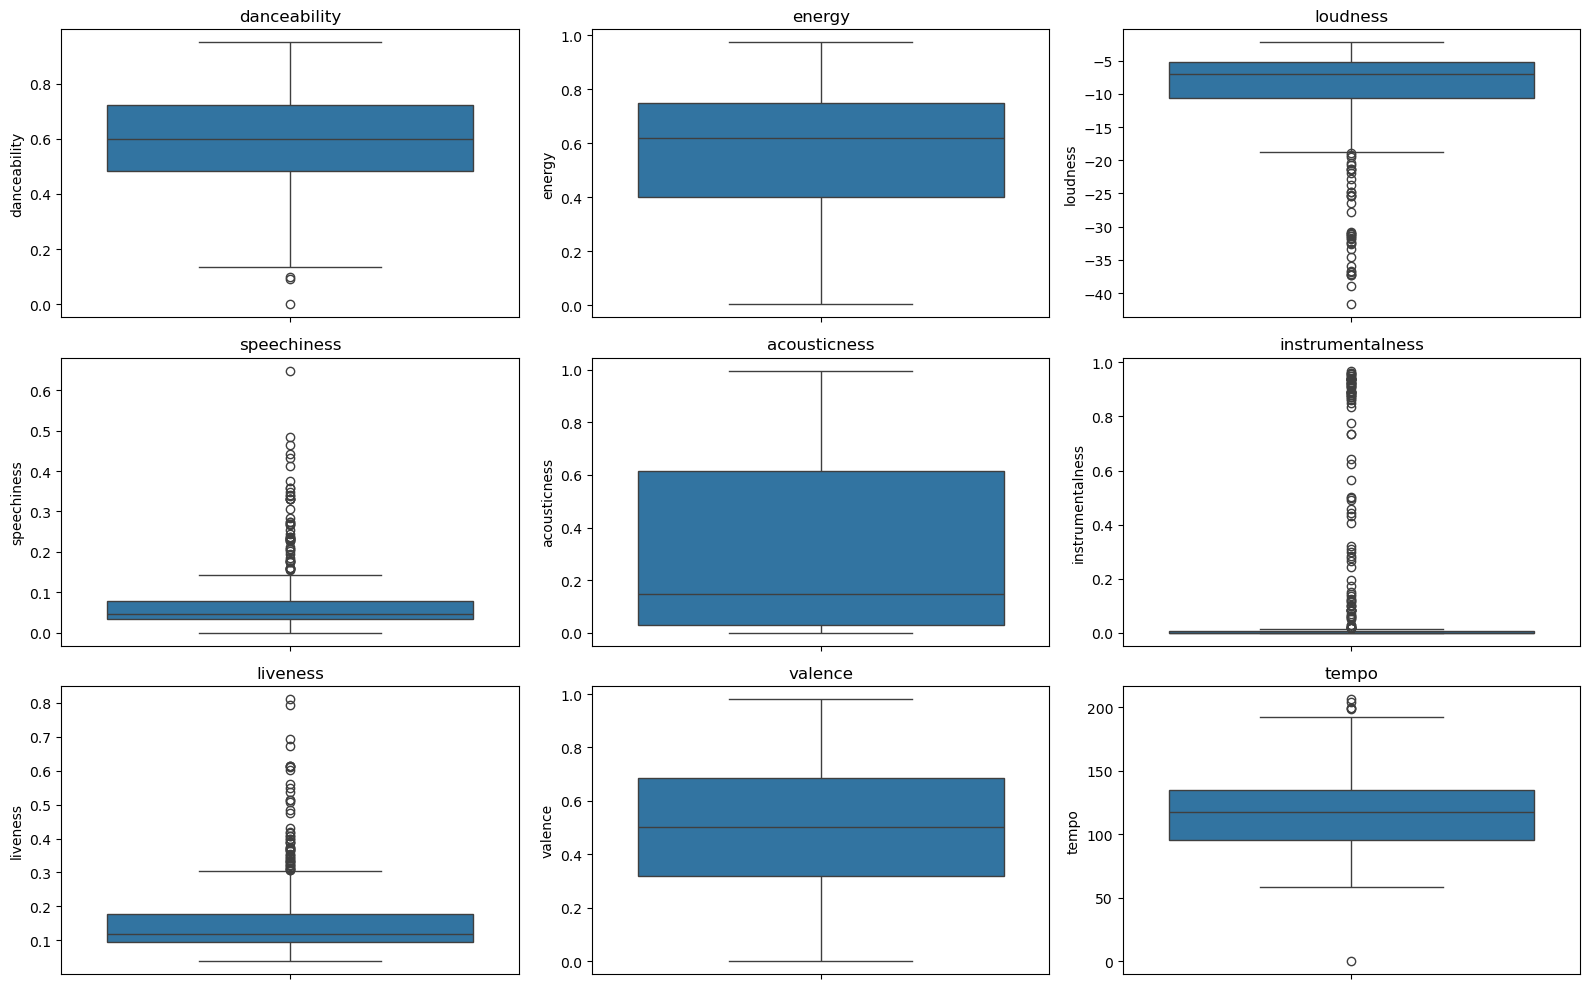

In [14]:
umbral_popularidad = 45 
df_populares = df[df['popularity'] > umbral_popularidad]

# Características a visualizar
caracteristicas = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Verificar si todas las características están en el DataFrame
caracteristicas_existentes = [caracteristica for caracteristica in caracteristicas if caracteristica in df.columns]
print("Características a graficar:", caracteristicas_existentes)

# Crear gráficos
plt.figure(figsize=(16, 10))
for i, caracteristica in enumerate(caracteristicas_existentes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_populares, y=caracteristica)
    plt.title(caracteristica)

plt.tight_layout()
plt.show()

In [15]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
            'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]  # Variables independientes (características de audio)
y = df['genre']   # Variable dependiente (género)

In [16]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC

# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo SVM
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo de Random Forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo Gradient Boosting
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

# Función para evaluar y mostrar resultados
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluar SVM
print("Support Vector Machine:")
evaluate_model(svm_model, X_test, y_test)

# Evaluar Random Forest
print("\nRandom Forest Classifier:")
evaluate_model(rf_model, X_test, y_test)

# Evaluar Gradient Boosting
print("\nGradient Boosting Classifier:")
evaluate_model(gb_model, X_test, y_test)

Support Vector Machine:
Accuracy Score: 0.7

Classification Report:
              precision    recall  f1-score   support

   classical       0.96      0.92      0.94        24
     hip-hop       0.50      0.90      0.64        10
        jazz       0.78      0.88      0.82        24
         pop       0.40      0.57      0.47        14
        rock       0.83      0.36      0.50        28

    accuracy                           0.70       100
   macro avg       0.69      0.72      0.67       100
weighted avg       0.76      0.70      0.69       100


Random Forest Classifier:
Accuracy Score: 0.69

Classification Report:
              precision    recall  f1-score   support

   classical       1.00      0.88      0.93        24
     hip-hop       0.56      0.90      0.69        10
        jazz       0.79      0.79      0.79        24
         pop       0.33      0.43      0.38        14
        rock       0.67      0.50      0.57        28

    accuracy                           0.69  

In [21]:
# Crear variables sintéticas adicionales
X_train['acousticness_liveness'] = X_train['acousticness'] * X_train['liveness']
X_train['energy_loudness'] = X_train['energy'] * X_train['loudness']
X_train['tempo_speechiness'] = X_train['tempo'] * X_train['speechiness']

# Aplicar las mismas transformaciones al conjunto de prueba
X_test['acousticness_liveness'] = X_test['acousticness'] * X_test['liveness']
X_test['energy_loudness'] = X_test['energy'] * X_test['loudness']
X_test['tempo_speechiness'] = X_test['tempo'] * X_test['speechiness']

In [22]:
# Reentrenar SVM
svm_model.fit(X_train, y_train)

# Reentrenar Random Forest
rf_model.fit(X_train, y_train)

# Reentrenar Gradient Boosting
gb_model.fit(X_train, y_train)

# Evaluar los modelos nuevamente
print("Support Vector Machine:")
evaluate_model(svm_model, X_test, y_test)

print("\nRandom Forest Classifier:")
evaluate_model(rf_model, X_test, y_test)

print("\nGradient Boosting Classifier:")
evaluate_model(gb_model, X_test, y_test)

Support Vector Machine:
Accuracy Score: 0.69

Classification Report:
              precision    recall  f1-score   support

   classical       0.96      0.92      0.94        24
     hip-hop       0.59      1.00      0.74        10
        jazz       0.86      0.75      0.80        24
         pop       0.37      0.71      0.49        14
        rock       0.75      0.32      0.45        28

    accuracy                           0.69       100
   macro avg       0.70      0.74      0.68       100
weighted avg       0.76      0.69      0.69       100


Random Forest Classifier:
Accuracy Score: 0.69

Classification Report:
              precision    recall  f1-score   support

   classical       0.96      0.92      0.94        24
     hip-hop       0.59      1.00      0.74        10
        jazz       0.76      0.79      0.78        24
         pop       0.23      0.21      0.22        14
        rock       0.68      0.54      0.60        28

    accuracy                           0.69 

In [23]:
# Evaluar el desempeño en el conjunto de entrenamiento
print("\n--- Evaluación en Conjunto de Entrenamiento ---\n")
print("Support Vector Machine (Train):")
evaluate_model(svm_model, X_train, y_train)

print("\nRandom Forest Classifier (Train):")
evaluate_model(rf_model, X_train, y_train)

print("\nGradient Boosting Classifier (Train):")
evaluate_model(gb_model, X_train, y_train)


--- Evaluación en Conjunto de Entrenamiento ---

Support Vector Machine (Train):
Accuracy Score: 0.685

Classification Report:
              precision    recall  f1-score   support

   classical       0.95      0.93      0.94        76
     hip-hop       0.72      0.72      0.72        90
        jazz       0.70      0.67      0.68        76
         pop       0.50      0.66      0.57        86
        rock       0.62      0.42      0.50        72

    accuracy                           0.69       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.70      0.69      0.68       400


Random Forest Classifier (Train):
Accuracy Score: 0.96

Classification Report:
              precision    recall  f1-score   support

   classical       1.00      0.99      0.99        76
     hip-hop       0.94      0.98      0.96        90
        jazz       0.99      1.00      0.99        76
         pop       0.92      0.91      0.91        86
        rock       0.97      0.9

Varianza explicada por los 2 primeros componentes: [0.40149778 0.15216456]
Cargas de los componentes:
[[ 0.41048515 -0.33634604 -0.40926773  0.36074078 -0.07213257 -0.40695655
  -0.17307475 -0.12448393 -0.19801521  0.27153143  0.23799663 -0.18678787]
 [ 0.09478042  0.06354875 -0.1658935   0.09680636  0.00472387 -0.14313521
   0.65744317  0.13503158 -0.12607819  0.09918337  0.10381796  0.66528177]]


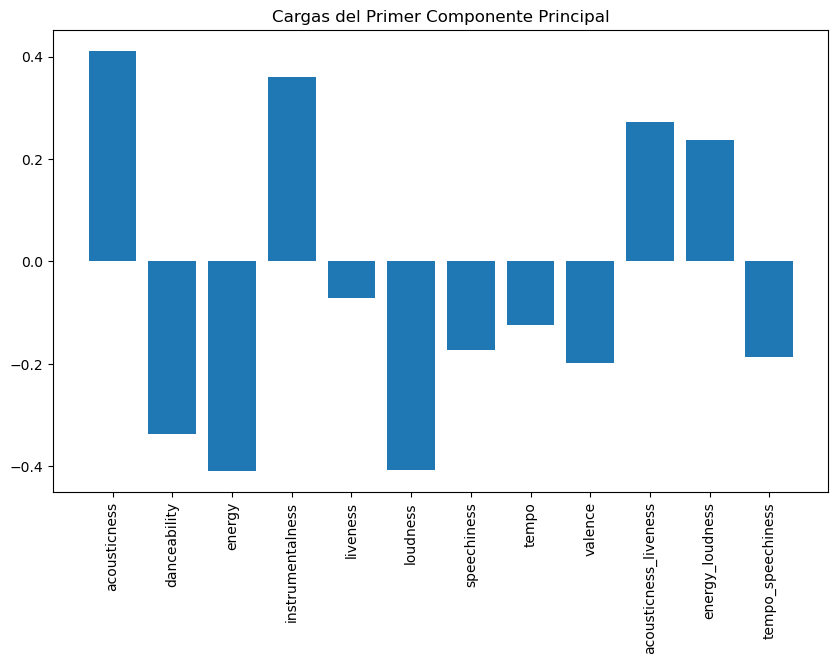

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Escalar las características antes de aplicar PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualizar la varianza explicada
print("Varianza explicada por los 2 primeros componentes:", pca.explained_variance_ratio_)

# Cargas de los 2 primeros componentes
print("Cargas de los componentes:")
print(pca.components_)

# Gráfico de las cargas
plt.figure(figsize=(10,6))
plt.bar(range(len(features + ['acousticness_liveness', 'energy_loudness', 'tempo_speechiness'])), pca.components_[0])
plt.xticks(range(len(features + ['acousticness_liveness', 'energy_loudness', 'tempo_speechiness'])), 
           features + ['acousticness_liveness', 'energy_loudness', 'tempo_speechiness'], rotation=90)
plt.title('Cargas del Primer Componente Principal')
plt.show()